In [124]:
# 데이터 분석 및 다루기
import pandas as pd
import numpy as np

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 불필요한 경고들 없애기
import warnings
warnings.filterwarnings('ignore')

## train과 test 데이터 불러오기

In [125]:
train_df = pd.read_csv('/content/drive/MyDrive/데이콘/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/데이콘/test.csv')

## 추가 데이터 불러오기

In [126]:
weather_df = pd.read_csv('/content/drive/MyDrive/데이콘/weather.csv') # weather_crawling.py 사용
bus_df = pd.read_csv('/content/drive/MyDrive/데이콘/bus.csv') # bus_crawling.py 사용

## train의 값들을 확인한다

In [127]:
train_df.columns.values

array(['id', 'date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude',
       'next_arrive_time'], dtype=object)

In [128]:
train_df.head(10)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
5,5,2019-10-15,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,07시,417.0,대림2차아파트,33.478850,126.488350,160
6,6,2019-10-15,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,07시,334.0,연동대림1차아파트,33.480700,126.489933,58
7,7,2019-10-15,405136001,7997025,360-1,33.482142,126.483213,롯데마트,07시,341.0,원노형,33.483446,126.480758,64
8,8,2019-10-15,405136001,7997025,360-1,33.483446,126.480758,원노형,07시,185.0,노형오거리,33.485854,126.480530,54
9,9,2019-10-15,405136001,7997025,360-1,33.485854,126.480530,노형오거리,07시,252.0,남녕고등학교,33.488046,126.483112,204


*   id => 의미 없음
*   date : 버스 운행 날짜
*   route_id : 버스 노선 id => route_nm이랑 동일한 역할
*   vh_id : 버스 id => 제외
*   route_nm : 버스 노선 실제 번호 => route_id랑 동일한 역할
*   now_latitude : 현재 정류소의 위도
*   now_longitude : 현재 정류소의 경도
*   now_station : 현재 정류소 이름
*   now_arrive_time : 현재 정류장에 도착한 시간 => int로 바꿔줘야함
*   distance : 현재 정류장에서 다음 정류장까지 실제 이동한 거리
*   next_station : 다음 정류소 이름
*   next_latitude : 다음 정류소의 위도
*   next_longitude : 다음 정류소의 경도
*  ***next_arrive_time : 다음 정류장에 도착할 때 걸리는 시간(단위: 초) 예측해야하는 값***



## null 값을 확인한다
null 값이 하나도 없음을 확인했다.

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


## 가장 관련이 있을거같은 distance를 확인
distance에 관련이 있음을 확인

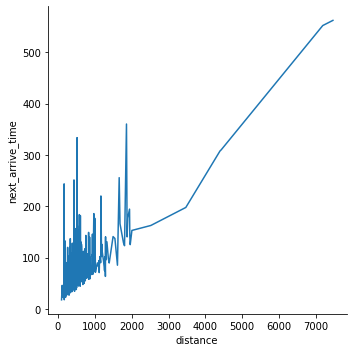

In [130]:
sns.relplot(x="distance", y="next_arrive_time", ci=None, kind="line", data=train_df)

## outlier가 모든 시간에 존재하는지 확인
어느 한 시간에만 존재한다면, 그 시간만 제거할 생각이었으나, 모든 시간에 존재하여 outlier를 정할 방법을 distance로 변경하였다.

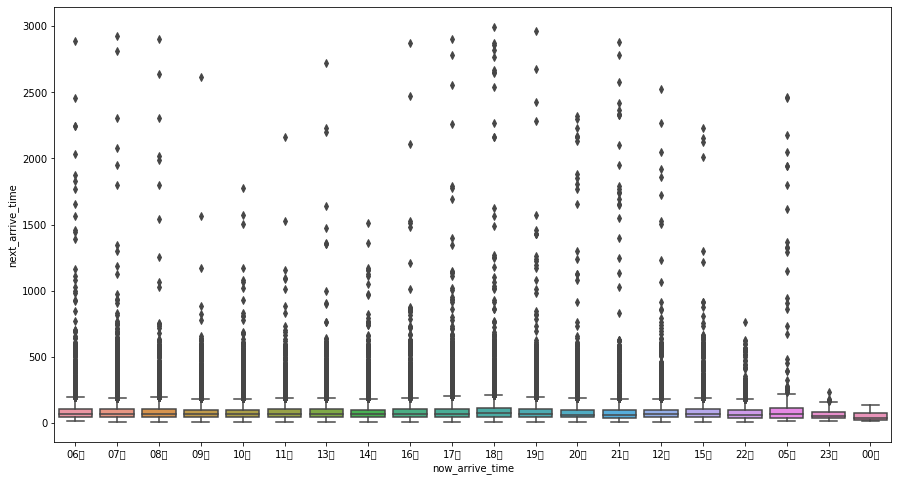

In [131]:
plt.figure(figsize=(15,8))
sns.boxplot(x="now_arrive_time", y="next_arrive_time",data=train_df)

가장 긴 distance에서 걸린 시간이 가장 길것으로 예측  
따라서 가장 이것보다 더 오래 걸린 시간은 제외할지 고민

In [132]:
print('Longest distance was:', train_df['distance'].max())

Longest distance was: 7461.0


In [133]:
print('Next arrive time for longest distance:', train_df[train_df['distance']==7461].next_arrive_time.max())

Next arrive time for longest distance: 664


거리에 비해 오래 걸린것이 문제라고 생각  
특정 speed 이하인것을 제외할 지 고민  
가장 긴 거리의 가장 큰 next_arrive_time을 확인해봤더니 outlier처럼 보이지 않아,  
그 이상의 데이터의 speed를 확인해봤더니, average 속도가 1.59km/h였다.

In [134]:
# km/h
train_df['speed'] = [(train_df['distance'].iloc[i]/1000)/(train_df['next_arrive_time'].iloc[i]/3600) for i in range(len(train_df))]

In [135]:
print('next_arrive_time 700이상 average speed',train_df[train_df['next_arrive_time']>700].speed.mean())
print('average speed:', train_df.speed.mean())
print('speed for longest distance:', train_df[train_df['distance']==7461].speed.mean())

next_arrive_time 700이상 average speed 1.5940638708762973
average speed: 24.79641189021395
speed for longest distance: 47.914506814294626


In [136]:
train_df[train_df['speed']<2].groupby('now_station').id.count()

now_station
고성리 구 성산농협           96
광양                    1
남국원(광양방면)             1
남녕고등학교                1
노형오거리                11
노형초등학교                5
농협 하나로마트              3
대륜동주민센터               4
동문성당                  1
부영아파트                 1
사회복지법인 춘강             3
산천단 한국폴리텍대학           4
삼무공원사거리               1
서귀포버스터미널(가상정류소)      12
서귀포여자고등학교             1
성산환승정류장(고성리 한국물류)    13
시티주유소                53
아라초등학교                2
아랑조을거리 입구             3
웃 인다 마을               1
정존마을                  2
제대마을                  2
제대아파트                41
제주고등학교/중흥S클래스        17
제주대학교                 4
청소년문화의집               1
탐라도서관                67
한국병원                  1
한라병원                  1
Name: id, dtype: int64

특정 정류장이 많이 나와서 적절한 기준이 아니라고 판단,  
now_station이 같다고 next_station이 다 동일하지않아서 now_station과 next_station을 합치기로함

In [137]:
train_df['from_to'] = [train_df['now_station'].iloc[i] + 'to' + train_df['next_station'].iloc[i] for i in range(len(train_df))]
train_df.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,speed,from_to
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,39.900000,제주대학교입구to제대마을
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,33.300000,제대마을to제대아파트
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,37.350000,제대아파트to제주대학교
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,49.542857,남국원(아라방면)to제주여자중고등학교(아라방면)
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,21.037500,도호동to은남동


In [138]:
test_df['from_to'] = [test_df['now_station'].iloc[i] + 'to' + test_df['next_station'].iloc[i] for i in range(len(test_df))]

In [139]:
def outlier(data):
  q3, q1 = np.percentile(data, [75, 25])
  iqr = q3 - q1
  return [q1 - 1.5*iqr, q3 + 1.5*iqr]

In [140]:
from_to_unique = train_df['from_to'].unique()
# print(from_to_unique)

outlier_iqr = {}
for i in range(len(from_to_unique)):
  outlier_iqr[from_to_unique[i]] = outlier(train_df[train_df['from_to']==from_to_unique[i]].speed)
  # print(from_to_unique[i], outlier_upper[from_to_unique[i]])

In [141]:
cnt = 0
for i in range(len(train_df)):
  if train_df.loc[i].speed > outlier_iqr[train_df.loc[i].from_to][1] or train_df.loc[i].speed < outlier_iqr[train_df.loc[i].from_to][0]:
    train_df = train_df.drop(index = [i])
    cnt += 1

print(cnt)

5731


In [142]:
train_df.reset_index(drop=True, inplace=True)

route_id, route_nm, vh_id가 관련성이 있어보여서 확인해보았다.  
결과적으로 route_id는 route_nm과 동일한것을 가리키며, route를 좀더 세분화한것이 vh_id임을 알 수 있었다.  
후에 하나만 남기고 drop해도 될듯하다.

In [143]:
print(len(train_df['route_id'].unique()))
print(len(train_df['route_nm'].unique()))
print(len(train_df['vh_id'].unique()))

21
21
104


In [144]:
route = train_df['route_nm'].unique();
total = 0
for r in route:
  temp = train_df[train_df['route_nm']==r]
  total+=len(temp['vh_id'].unique())

print(total)

104


출발 정류장과 도착 정류장 사이의 위도 경도값과 제주시, 서귀포시 사이의 거리를 구함

In [145]:
from geopy.distance import geodesic

jeju_si = (33.4996, 126.5312)
seogwipo_si = (33.2541, 126.5601)

train_df['jeju_si'] =  [geodesic(((train_df['now_latitude'].iloc[i]+train_df['next_latitude'].iloc[i])/2,(train_df['now_longitude'].iloc[i]+train_df['next_longitude'].iloc[i])/2), jeju_si).m for i in range(len(train_df))]
train_df['seogwipo_si'] = [geodesic(((train_df['now_latitude'].iloc[i]+train_df['next_latitude'].iloc[i])/2,(train_df['now_longitude'].iloc[i]+train_df['next_longitude'].iloc[i])/2), seogwipo_si).m for i in range(len(train_df))]

train_df['downtown'] = [min(train_df['jeju_si'].iloc[i], train_df['seogwipo_si'].iloc[i]) for i in range(len(train_df))]

train_df[['jeju_si', 'seogwipo_si', 'downtown']]

,jeju_si,seogwipo_si,downtown
0,5137.174954,22513.328728,5137.174954
1,5119.433799,22646.561587,5119.433799
2,5182.124165,22763.186438,5182.124165
3,2228.960194,25355.804670,2228.960194
4,3876.081330,26441.607223,3876.081330
...,...,...,...
204721,27573.601623,1475.720485,1475.720485
204722,27976.811167,861.135591,861.135591
204723,27647.979719,290.197797,290.197797
204724,27769.920134,438.915277,438.915277


In [146]:
test_df['jeju_si'] =  [geodesic(((test_df['now_latitude'].iloc[i]+test_df['next_latitude'].iloc[i])/2,(test_df['now_longitude'].iloc[i]+test_df['next_longitude'].iloc[i])/2), jeju_si).m for i in range(len(test_df))]
test_df['seogwipo_si'] = [geodesic(((test_df['now_latitude'].iloc[i]+test_df['next_latitude'].iloc[i])/2,(test_df['now_longitude'].iloc[i]+test_df['next_longitude'].iloc[i])/2), seogwipo_si).m for i in range(len(test_df))]

test_df['downtown'] = [min(test_df['jeju_si'].iloc[i], test_df['seogwipo_si'].iloc[i]) for i in range(len(test_df))]

test_df[['jeju_si', 'seogwipo_si', 'downtown']]

,jeju_si,seogwipo_si,downtown
0,5119.433799,22646.561587,5119.433799
1,5182.124165,22763.186438,5182.124165
2,4781.857423,25862.201663,4781.857423
3,4484.693323,25886.325692,4484.693323
4,4523.767805,26095.051062,4523.767805
...,...,...,...
91769,608.012753,26783.934016,608.012753
91770,265.596140,27095.943093,265.596140
91771,230.060565,27395.668887,230.060565
91772,457.018126,27491.757151,457.018126


In [147]:
testing = (33.49724304, 126.453374) # 이호테우 해변을 기준으로...
print(geodesic(((jeju_si[0]+testing[0])/2, (jeju_si[1]+testing[1])/2), jeju_si).m)

3618.297723340945


In [148]:
print(train_df[train_df['downtown']<3700].id.count())

100278


downtown 값이 3700m 미만인것을 city로 하자

In [149]:
train_df['city'] = 0
for i in range(len(train_df)):
  if train_df['downtown'].iloc[i] < 3700:
    train_df['city'].iloc[i] = 1

In [150]:
test_df['city'] = 0
for i in range(len(test_df)):
  if test_df['downtown'].iloc[i] < 3700:
    test_df['city'].iloc[i] = 1

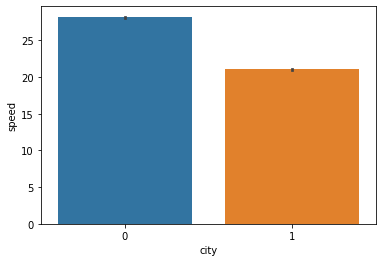

In [151]:
sns.barplot(x="city", y="speed", data=train_df)

## date를 요일별로 나누기

In [152]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['weekday'] = train_df['date'].dt.strftime('%a')
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['weekday'] = test_df['date'].dt.strftime('%a')
train_df.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,...,next_latitude,next_longitude,next_arrive_time,speed,from_to,jeju_si,seogwipo_si,downtown,city,weekday
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,...,33.457724,126.554014,24,39.900000,제주대학교입구to제대마을,5137.174954,22513.328728,5137.174954,0,Tue
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,...,33.458783,126.557353,36,33.300000,제대마을to제대아파트,5119.433799,22646.561587,5119.433799,0,Tue
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,...,33.459893,126.561624,40,37.350000,제대아파트to제주대학교,5182.124165,22763.186438,5182.124165,0,Tue
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,...,33.484860,126.542928,42,49.542857,남국원(아라방면)to제주여자중고등학교(아라방면),2228.960194,25355.804670,2228.960194,1,Tue
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,...,33.485822,126.490897,64,21.037500,도호동to은남동,3876.081330,26441.607223,3876.081330,0,Tue


In [153]:
train_df['weekend'] = 0
for i in range(len(train_df)):
  if train_df['weekday'].iloc[i] == 'Sat' or train_df['weekday'].iloc[i] == 'Sun':
    train_df['weekend'].iloc[i] = 1

In [154]:
test_df['weekend'] = 0
for i in range(len(test_df)):
  if test_df['weekday'].iloc[i] == 'Sat' or test_df['weekday'].iloc[i] == 'Sun':
    test_df['weekend'].iloc[i] = 1

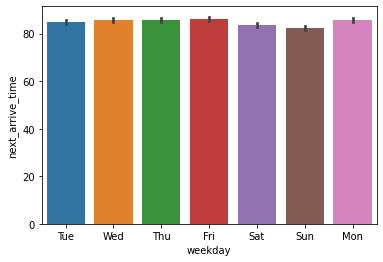

In [155]:
sns.barplot(x="weekday", y="next_arrive_time", data=train_df)

In [156]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['weekday'] = train_df['date'].dt.weekday

test_df['date'] = pd.to_datetime(test_df['date'])
test_df['weekday'] = test_df['date'].dt.weekday

train_df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,...,next_longitude,next_arrive_time,speed,from_to,jeju_si,seogwipo_si,downtown,city,weekday,weekend
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,...,126.554014,24,39.900000,제주대학교입구to제대마을,5137.174954,22513.328728,5137.174954,0,1,0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,...,126.557353,36,33.300000,제대마을to제대아파트,5119.433799,22646.561587,5119.433799,0,1,0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,...,126.561624,40,37.350000,제대아파트to제주대학교,5182.124165,22763.186438,5182.124165,0,1,0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,...,126.542928,42,49.542857,남국원(아라방면)to제주여자중고등학교(아라방면),2228.960194,25355.804670,2228.960194,1,1,0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,...,126.490897,64,21.037500,도호동to은남동,3876.081330,26441.607223,3876.081330,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204721,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,...,126.574417,96,19.800000,비석거리to삼아아파트,27573.601623,1475.720485,1475.720485,1,0,0
204722,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,...,126.565959,50,20.160000,동문로터리to매일올레시장 7번입구,27976.811167,861.135591,861.135591,1,0,0
204723,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,...,126.559551,16,25.650000,서귀포시 구 버스터미널to아랑조을거리 입구,27647.979719,290.197797,290.197797,1,0,0
204724,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,...,126.558068,38,21.126316,아랑조을거리 입구to평생학습관,27769.920134,438.915277,438.915277,1,0,0


In [157]:
train_df['weekday_num'] = train_df['weekday']
test_df['weekday_num'] = test_df['weekday']

train_df.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,...,next_arrive_time,speed,from_to,jeju_si,seogwipo_si,downtown,city,weekday,weekend,weekday_num
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,...,24,39.900000,제주대학교입구to제대마을,5137.174954,22513.328728,5137.174954,0,1,0,1
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,...,36,33.300000,제대마을to제대아파트,5119.433799,22646.561587,5119.433799,0,1,0,1
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,...,40,37.350000,제대아파트to제주대학교,5182.124165,22763.186438,5182.124165,0,1,0,1
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,...,42,49.542857,남국원(아라방면)to제주여자중고등학교(아라방면),2228.960194,25355.804670,2228.960194,1,1,0,1
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,...,64,21.037500,도호동to은남동,3876.081330,26441.607223,3876.081330,0,1,0,1


In [158]:
train_df = pd.get_dummies(train_df, columns = ['weekday'])
test_df = pd.get_dummies(test_df, columns = ['weekday'])

In [159]:
train_df.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,...,city,weekend,weekday_num,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,...,0,0,1,0,1,0,0,0,0,0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,...,0,0,1,0,1,0,0,0,0,0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,...,0,0,1,0,1,0,0,0,0,0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,...,1,0,1,0,1,0,0,0,0,0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,...,0,0,1,0,1,0,0,0,0,0


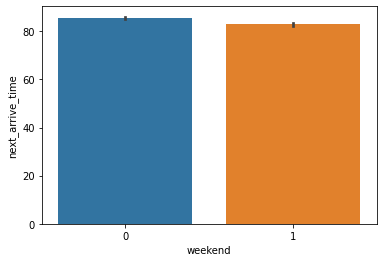

In [160]:
sns.barplot(x="weekend", y="next_arrive_time", data=train_df)

실제 거리와 stragiht_distance의 ratio는 커브와 상관이 있지 않을까  
curve가 많을수록 신호등도 많고, 속도를 줄여야하고, 따라서 걸리는 시간이 길어지지 않을까

In [161]:
train_df['curve'] = [train_df['distance'].iloc[i]/geodesic((train_df['now_latitude'].iloc[i],train_df['now_longitude'].iloc[i]), (train_df['next_latitude'].iloc[i], train_df['next_longitude'].iloc[i])).m for i in range(len(train_df))]
test_df['curve'] = [test_df['distance'].iloc[i]/geodesic((test_df['now_latitude'].iloc[i],test_df['now_longitude'].iloc[i]), (test_df['next_latitude'].iloc[i], test_df['next_longitude'].iloc[i])).m for i in range(len(test_df))]

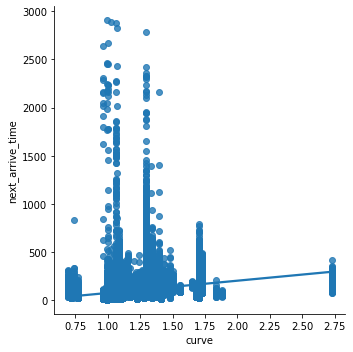

In [162]:
sns.lmplot(x="curve", y="next_arrive_time", data=train_df)

## 시간 확인

In [163]:
train_df['now_arrive_time'] = train_df['now_arrive_time'].apply(lambda x : int(x[:-1]))
test_df['now_arrive_time'] = test_df['now_arrive_time'].apply(lambda x : int(x[:-1]))

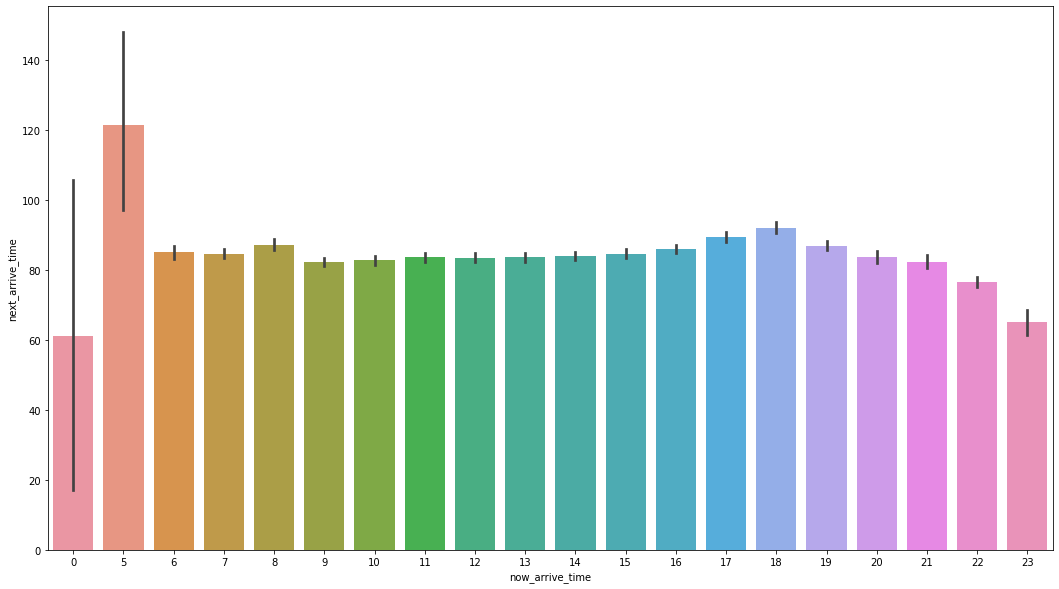

In [164]:
plt.figure(figsize=(18,10))
sns.barplot(x="now_arrive_time", y="next_arrive_time", data=train_df)#, showfliers=False)

In [165]:
train_df[['now_arrive_time', 'next_arrive_time']].groupby(['now_arrive_time'], as_index = False).mean()

,now_arrive_time,next_arrive_time
0,0,61.000000
1,5,121.451613
2,6,85.050503
3,7,84.645161
4,8,87.230540
5,9,82.289582
6,10,82.740175
7,11,83.563697
8,12,83.487927
9,13,83.601738


## 학습데이터와 테스트 데이터 합치기  
'cue' == 0이면 train  
'cue' == 1이면 text

In [166]:
train_df['cue'] = 0
test_df['cue'] = 1

df = pd.concat([train_df, test_df], axis=0)
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,...,weekday_num,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,curve,cue
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,6,266.0,...,1,0,1,0,0,0,0,0,1.002407,0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,6,333.0,...,1,0,1,0,0,0,0,0,1.003327,0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,6,415.0,...,1,0,1,0,0,0,0,0,0.998301,0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),6,578.0,...,1,0,1,0,0,0,0,0,1.000664,0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,7,374.0,...,1,0,1,0,0,0,0,0,0.998430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20,272.0,...,1,0,1,0,0,0,0,0,0.993913,1
91770,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20,447.0,...,1,0,1,0,0,0,0,0,1.006157,1
91771,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20,418.0,...,1,0,1,0,0,0,0,0,1.203806,1
91772,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20,140.0,...,1,0,1,0,0,0,0,0,0.999990,1


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296500 entries, 0 to 91773
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                296500 non-null  int64         
 1   date              296500 non-null  datetime64[ns]
 2   route_id          296500 non-null  int64         
 3   vh_id             296500 non-null  int64         
 4   route_nm          296500 non-null  object        
 5   now_latitude      296500 non-null  float64       
 6   now_longitude     296500 non-null  float64       
 7   now_station       296500 non-null  object        
 8   now_arrive_time   296500 non-null  int64         
 9   distance          296500 non-null  float64       
 10  next_station      296500 non-null  object        
 11  next_latitude     296500 non-null  float64       
 12  next_longitude    296500 non-null  float64       
 13  next_arrive_time  204726 non-null  float64       
 14  speed

## 버스 종류별 평균 걸린 시간

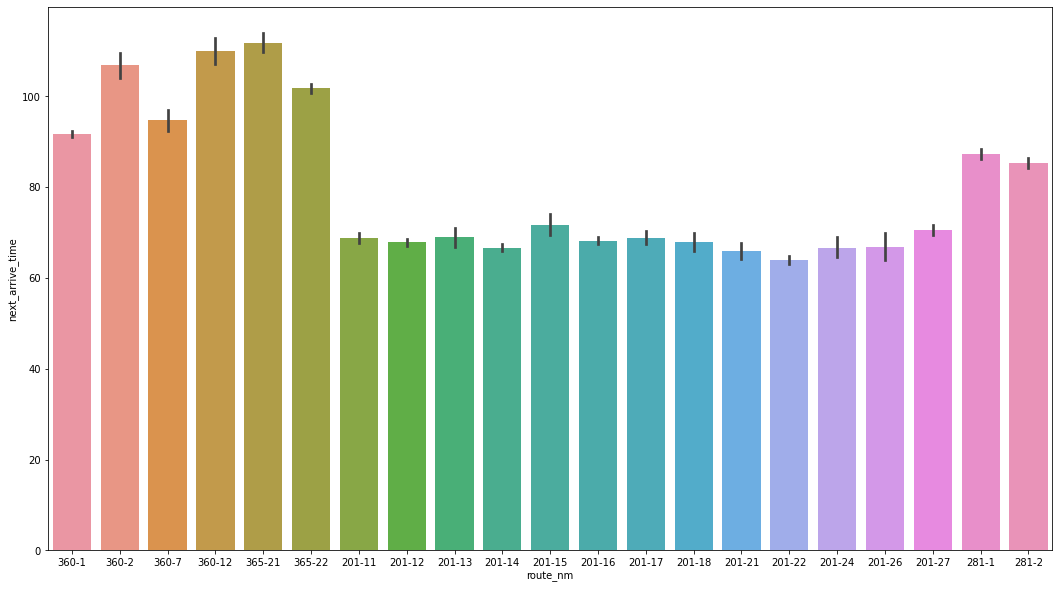

In [168]:
plt.figure(figsize=(18,10))
sns.barplot(x="route_nm", y="next_arrive_time", data=train_df)

360번대, 180번대 버스가 좀 더 늦음

In [169]:
df['bus'] = df['route_nm'].apply(lambda x : x[:3])

In [170]:
print(df['bus'].unique())

['360' '365' '201' '281']


In [171]:
def bus_mean():
  train_data = df.query('cue == 0').reset_index(drop = True)

  df['bus_mean'] = 1

  index_360 = df.query('bus == "360"').index
  index_365 = df.query('bus == "365"').index
  index_201 = df.query('bus == "201"').index
  index_281 = df.query('bus == "281"').index

  df.iloc[index_360, -1] = train_data.query('bus == "360"')['next_arrive_time'].mean()
  df.iloc[index_365, -1] = train_data.query('bus == "365"')['next_arrive_time'].mean()
  df.iloc[index_201, -1] = train_data.query('bus == "201"')['next_arrive_time'].mean()
  df.iloc[index_281, -1] = train_data.query('bus == "281"')['next_arrive_time'].mean()

  return df

In [172]:
df = bus_mean()

In [173]:
df[['bus_mean']].head()

,bus_mean
0,98.462815
1,98.462815
2,98.462815
3,98.462815
4,98.462815


In [174]:
print(df['route_nm'].unique())

['360-1' '360-2' '360-7' '360-12' '365-21' '365-22' '201-11' '201-12'
 '201-13' '201-14' '201-15' '201-16' '201-17' '201-18' '201-21' '201-22'
 '201-24' '201-26' '201-27' '281-1' '281-2']


In [175]:
route_nm_unique = train_df['route_nm'].unique()

In [176]:
def route_mean():
  train_data = df.query('cue == 0').reset_index(drop = True)

  df['route_mean'] = 1

  for i in range(len(route_nm_unique)):
    index = df[df['route_nm'] == route_nm_unique[i]].index

    df.iloc[index, -1] = train_data[train_data['route_nm'] == route_nm_unique[i]]['next_arrive_time'].mean()

  return df

In [177]:
df = route_mean()

In [178]:
df[['route_mean']].head()

,route_mean
0,91.687562
1,91.687562
2,91.687562
3,91.687562
4,91.687562


## bus interval data 합치기
df를 기준으로 'bus'를 key로 해서 합침

In [179]:
df['bus'] = df['bus'].apply(lambda x : int(x))

In [180]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4 non-null      int64  
 1   bus         4 non-null      int64  
 2   interval    4 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 224.0 bytes


In [181]:
df = pd.merge(df, bus_df[['bus', 'interval']], how='left', on='bus')

In [182]:
df['bus'].unique()

array([360, 365, 201, 281])

In [183]:
df = pd.get_dummies(df, columns=['bus'])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296500 entries, 0 to 296499
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                296500 non-null  int64         
 1   date              296500 non-null  datetime64[ns]
 2   route_id          296500 non-null  int64         
 3   vh_id             296500 non-null  int64         
 4   route_nm          296500 non-null  object        
 5   now_latitude      296500 non-null  float64       
 6   now_longitude     296500 non-null  float64       
 7   now_station       296500 non-null  object        
 8   now_arrive_time   296500 non-null  int64         
 9   distance          296500 non-null  float64       
 10  next_station      296500 non-null  object        
 11  next_latitude     296500 non-null  float64       
 12  next_longitude    296500 non-null  float64       
 13  next_arrive_time  204726 non-null  float64       
 14  spee

In [185]:
from_to_unique

array(['제주대학교입구to제대마을', '제대마을to제대아파트', '제대아파트to제주대학교',
       '남국원(아라방면)to제주여자중고등학교(아라방면)', '도호동to은남동', '한라중학교/부영아파트to대림2차아파트',
       '대림2차아파트to연동대림1차아파트', '롯데마트to원노형', '원노형to노형오거리', '노형오거리to남녕고등학교',
       '남녕고등학교to한라병원', '한라병원to삼무공원사거리', '삼무공원사거리to제원아파트', '제원아파트to은남동',
       '은남동to도호동', '도호동to연동주민센터', '연동주민센터to제주도청 신제주로터리',
       '제주도청 신제주로터리to연동입구', '월구마을to동성마을', '동성마을to제주버스터미널',
       '제주버스터미널to한국병원', '한국병원to남서광마을입구', '남서광마을입구to남서광마을',
       '남서광마을to탐라장애인 종합복지관', '탐라장애인 종합복지관to제주시청(아라방면)',
       '제주시청(아라방면)to고산동산(아라방면)', '고산동산(아라방면)to제주지방법원(아라방면)',
       '제주지방법원(아라방면)to제주중앙여자고등학교(아라방면)', '남국원(아라방면)to아라초등학교',
       '아라초등학교to아라주공아파트', '아라주공아파트to인다마을', '인다마을to제주대학교병원',
       '남국사to제주대학교입구', '연동대림1차아파트to케이티앤지', '케이티앤지to롯데마트',
       '제주중앙여자고등학교(아라방면)to제주여자중고등학교(아라방면)', '제주여자중고등학교(아라방면)to남국원(아라방면)',
       '제주대학교병원to죽성마을 입구', '제주여자중고등학교(아라방면)to제주중앙여자고등학교(아라방면)',
       '고산동산(아라방면)to제주시청(아라방면)', '연동입구to오라3동', '오라3동to월구마을',
       '제대마을to제주대학교입구', '제주중앙여자고등학교(아라방면)to제주지방법원(아라방면)'

In [186]:
from pandas.core.indexes.base import Index
def station_mean():
  train_data = df.query('cue == 0').reset_index(drop = True)

  df['station_mean'] = 1

  for i in range(len(from_to_unique)):
    index = df[df['from_to'] == from_to_unique[i]].index

    df.iloc[index, -1] = train_data[train_data['from_to'] == from_to_unique[i]]['next_arrive_time'].mean()

  return df

In [187]:
df = station_mean()

In [188]:
df['station_mean']

0          28.762100
1          36.672401
2          53.854002
3          55.413555
4          62.414437
             ...    
296495    102.874786
296496     73.308741
296497    117.732068
296498     34.946026
296499    107.172798
Name: station_mean, Length: 296500, dtype: float64

## weather.csv 합치기
df를 기준으로 'date'를 key로 해서 합침  
강수량이 적어서 그런지 전혀 관련이...없음...  
drop 할 예정

In [189]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
df['date'] = pd.to_datetime(df['date'])

In [190]:
df = pd.merge(df, weather_df[['date', 'precipitation']], how='left', on='date')

In [191]:
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,...,cue,bus_mean,route_mean,interval,bus_201,bus_281,bus_360,bus_365,station_mean,precipitation
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,6,266.0,...,0,98.462815,91.687562,11.0,0,0,1,0,28.762100,3.2
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,6,333.0,...,0,98.462815,91.687562,11.0,0,0,1,0,36.672401,3.2
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,6,415.0,...,0,98.462815,91.687562,11.0,0,0,1,0,53.854002,3.2
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),6,578.0,...,0,98.462815,91.687562,11.0,0,0,1,0,55.413555,3.2
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,7,374.0,...,0,98.462815,91.687562,11.0,0,0,1,0,62.414437,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296495,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20,272.0,...,1,1.000000,1.000000,17.0,0,1,0,0,102.874786,0.0
296496,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20,447.0,...,1,1.000000,1.000000,17.0,0,1,0,0,73.308741,0.0
296497,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20,418.0,...,1,1.000000,1.000000,17.0,0,1,0,0,117.732068,0.0
296498,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20,140.0,...,1,1.000000,1.000000,17.0,0,1,0,0,34.946026,0.0


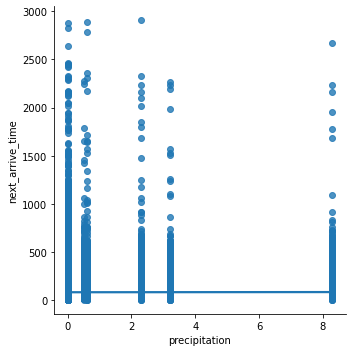

In [192]:
sns.lmplot(x="precipitation", y="next_arrive_time", data=df[df['cue']==0])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296500 entries, 0 to 296499
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                296500 non-null  int64         
 1   date              296500 non-null  datetime64[ns]
 2   route_id          296500 non-null  int64         
 3   vh_id             296500 non-null  int64         
 4   route_nm          296500 non-null  object        
 5   now_latitude      296500 non-null  float64       
 6   now_longitude     296500 non-null  float64       
 7   now_station       296500 non-null  object        
 8   now_arrive_time   296500 non-null  int64         
 9   distance          296500 non-null  float64       
 10  next_station      296500 non-null  object        
 11  next_latitude     296500 non-null  float64       
 12  next_longitude    296500 non-null  float64       
 13  next_arrive_time  204726 non-null  float64       
 14  spee

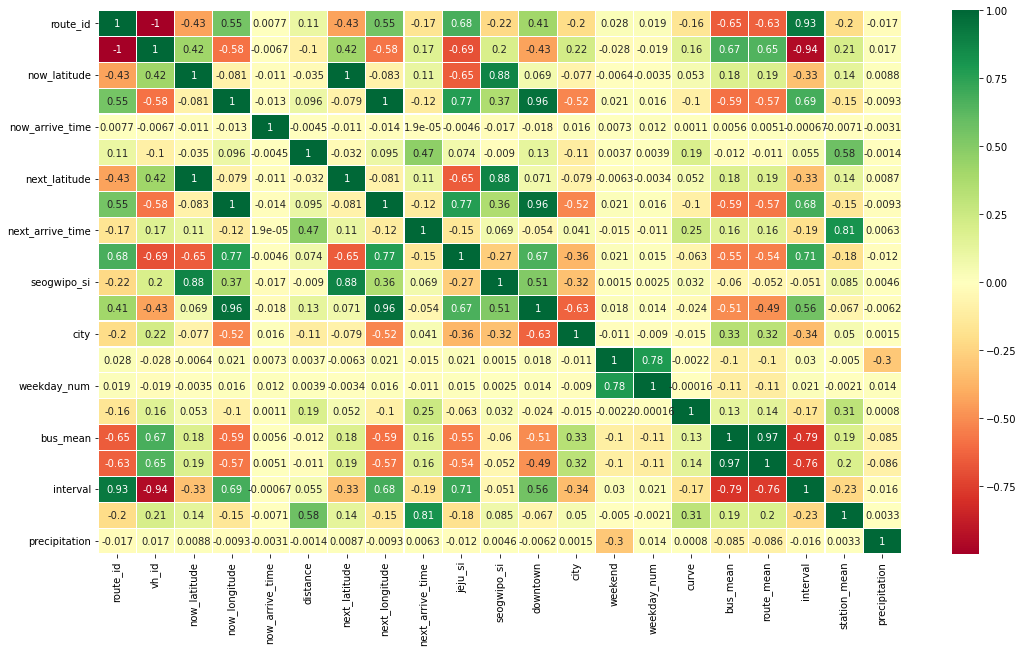

In [194]:
heat_df = df[df['cue']==0]
sns.heatmap(heat_df[['route_id', 'vh_id', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude',
       'next_arrive_time', 'jeju_si', 'seogwipo_si',
       'downtown', 'city', 'weekend', 'weekday_num', 
       'curve', 'bus_mean', 'route_mean', 'interval',
       'station_mean', 'precipitation']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.show()

## 모델 구축과 검증

object, datetime 형태 변수 제거

In [195]:
object_column = list(df.columns[df.dtypes == 'object'])
df = df.drop(object_column, axis = 'columns')

datetime_column = list(df.columns[df.dtypes == 'datetime64[ns]'])
df = df.drop(datetime_column, axis = 'columns')

id, seogwipo_si, precipitation, speed 제거

In [196]:
df = df.drop(columns = ['id', 'seogwipo_si', 'precipitation', 'speed'])

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296500 entries, 0 to 296499
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   route_id          296500 non-null  int64  
 1   vh_id             296500 non-null  int64  
 2   now_latitude      296500 non-null  float64
 3   now_longitude     296500 non-null  float64
 4   now_arrive_time   296500 non-null  int64  
 5   distance          296500 non-null  float64
 6   next_latitude     296500 non-null  float64
 7   next_longitude    296500 non-null  float64
 8   next_arrive_time  204726 non-null  float64
 9   jeju_si           296500 non-null  float64
 10  downtown          296500 non-null  float64
 11  city              296500 non-null  int64  
 12  weekend           296500 non-null  int64  
 13  weekday_num       296500 non-null  int64  
 14  weekday_0         296500 non-null  uint8  
 15  weekday_1         296500 non-null  uint8  
 16  weekday_2         29

In [198]:
# 학습데이터
X_train = df[df['cue']==0].drop(['cue', 'next_arrive_time'], axis = 'columns')
# 테스트 데이터
X_test = df[df['cue']==1].drop(['cue', 'next_arrive_time'], axis = 'columns')
# 타깃 변수
y_train = df[df['cue']==0]['next_arrive_time']

## random forest
가장 먼저 시도해볼만한..  
여러개의 결정트리의 예측값들간에 보팅을 통해서 최종 출력값을 만들어내는 기법

In [199]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 1217)

rf_model.fit(X_train, y_train)

rf_y_test = rf_model.predict(X_test)

## XGBoost

In [200]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state = 1217)

xgb_model.fit(X_train, y_train)

xgb_y_test = xgb_model.predict(X_test)

[06:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## LightGBM

In [201]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state = 1217)

lgbm.fit(X_train, y_train)

lgbm_y_test = lgbm.predict(X_test)

## 교차 검증: rf

In [250]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

print(f'cross_val_score\n{np.sqrt(-scores)}')
print(f'cross_val_score.mean\n{np.sqrt(-scores.mean()):.3f}')

cross_val_score
[47.550781   42.18430003 52.53020767 47.27657545 45.12780743]
cross_val_score.mean
47.057


## 변수 선택: rf

station_mean, distance, curve, interval, route_id, vh_id, bus_mean, route_mean, jeju_si, next_latitude, now_latitude, next_longitude, now_longitude

In [259]:
var_X_train = X_train[['distance', 'station_mean', 'curve', 'interval', 'next_latitude', 'next_longitude']]

scores = cross_val_score(rf_model, var_X_train, y_train, 
                         cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

print(f'cross_val_score\n{np.sqrt(-scores)}')
print(f'cross_val_score.mean\n{np.sqrt(-scores.mean()):.3f}')
# 'distance', 'station_mean' : 46.653
# 'distance', 'station_mean', 'curve' : 46.522
# 'distance', 'station_mean', 'curve', 'interval' : 46.357
# 'distance', 'station_mean', 'curve', 'interval', 'route_id' : 46.373
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id' : 46.410
# 'distance', 'station_mean', 'curve', 'interval', 'bus_mean' : 46.524
# 'distance', 'station_mean', 'curve', 'interval', 'route_mean' : 46.906
# 'distance', 'station_mean', 'curve', 'interval', 'jeju_si' : 46.366
# 'distance', 'station_mean', 'curve', 'interval', 'next_latitude' : 46.348
# 'distance', 'station_mean', 'curve', 'interval', 'next_latitude', 'now_latitude' : 46.408
# 'distance', 'station_mean', 'curve', 'interval', 'next_latitude', 'next_longitude' : 46.363 ?
# 'distance', 'station_mean', 'curve', 'interval', 'next_latitude', 'next_longitude', 'now_longitude' : 46.371 ?

cross_val_score
[43.63860768 42.94229079 52.55068466 48.27648837 43.71012074]
cross_val_score.mean
46.371


In [202]:
input_var1 = ['distance', 'station_mean', 'curve', 'interval']

## 교차 검증: xgb

In [251]:
scores = cross_val_score(xgb_model, X_train, y_train, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

print(f'cross_val_score\n{np.sqrt(-scores)}')
print(f'cross_val_score.mean\n{np.sqrt(-scores.mean()):.3f}')

cross_val_score
[42.37907561 44.06280896 51.23020331 46.4429037  41.78136547]
cross_val_score.mean
45.309


## 변수 선택: xgb

In [272]:
var_X_train = X_train[['distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean', 'now_longitude']]

scores = cross_val_score(xgb_model, var_X_train, y_train, 
                         cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

print(f'cross_val_score\n{np.sqrt(-scores)}')
print(f'cross_val_score.mean\n{np.sqrt(-scores.mean()):.3f}')
# 'distance', 'station_mean' : 46.944
# 'distance', 'station_mean', 'curve' : 46.845
# 'distance', 'station_mean', 'curve', 'interval' : 46.752
# 'distance', 'station_mean', 'curve', 'interval', 'route_id' : 46.763
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id' : 46.719
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean' : 46.709
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean', 'route_mean' : 46.763
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean', 'jeju_si' : 46.859
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean', 'next_latitude' : 46.824
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean', 'now_latitude' : 46.895
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean', 'next_longitude' : 46.745
# 'distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean', 'now_longitude' : 46.808

cross_val_score
[44.22904189 44.36312566 52.67642725 48.58203309 43.54002752]
cross_val_score.mean
46.808


In [203]:
input_var2 = ['distance', 'station_mean', 'curve', 'interval', 'vh_id', 'bus_mean']

## 교차 검증: lgb

In [252]:
scores = cross_val_score(lgbm, X_train, y_train, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

print(f'cross_val_score\n{np.sqrt(-scores)}')
print(f'cross_val_score.mean\n{np.sqrt(-scores.mean()):.3f}')

cross_val_score
[42.44421808 43.58151981 49.25703102 45.5048122  41.18058208]
cross_val_score.mean
44.483


## 변수 선택: lgb

In [285]:
var_X_train = X_train[['distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'jeju_si', 'now_latitude', 'now_longitude']]

scores = cross_val_score(lgbm, var_X_train, y_train, 
                         cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

print(f'cross_val_score\n{np.sqrt(-scores)}')
print(f'cross_val_score.mean\n{np.sqrt(-scores.mean()):.3f}')
# 'distance', 'station_mean' : 47.290
# 'distance', 'station_mean', 'curve' : 47.130
# 'distance', 'station_mean', 'curve', 'interval' : 46.928
# 'distance', 'station_mean', 'curve', 'interval', 'route_id' : 46.787
# 'distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id' : 46.145
# 'distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'bus_mean' : 46.298
# 'distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'route_mean' : 46.256
# 'distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'jeju_si' : 46.134
# 'distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'jeju_si', 'next_latitude' : 46.139
# 'distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'jeju_si', 'now_latitude' : 46.106
# 'distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'jeju_si', 'now_latitude', 'next_longitude' : 46.198
# 'distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'jeju_si', 'now_latitude', 'now_longitude' : 46.183

cross_val_score
[44.25197795 44.21419514 51.20972941 47.87420698 42.85571923]
cross_val_score.mean
46.183


In [204]:
input_var3 = ['distance', 'station_mean', 'curve', 'interval', 'route_id', 'vh_id', 'jeju_si', 'now_latitude']

## 그리드 탐색
var1

In [216]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [200, 300, 500],
          'max_features' : [2, 3, 5],
          'min_samples_leaf' : [1, 3, 5]}

In [217]:
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = 1)

grid_cv.fit(X_train[input_var1], y_train)

print('최적 하이퍼파라미터 :', grid_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE):{np.sqrt(grid_cv.best_score_)}')

최적 하이퍼파라미터 : {'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 200}
최적 하이퍼파라미터의 성능(RMSE):0.8083720633745958


rf var2

In [293]:
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = 1)

grid_cv.fit(X_train[input_var2], y_train)

print('최적 하이퍼파라미터 :', grid_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE):{np.sqrt(grid_cv.best_score_)}')

최적 하이퍼파라미터 : {'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 200}
최적 하이퍼파라미터의 성능(RMSE):0.8076642473922274


rf var3

In [83]:
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = 1)

grid_cv.fit(X_train[input_var3], y_train)

print('최적 하이퍼파라미터 :', grid_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE):{np.sqrt(grid_cv.best_score_)}')

최적 하이퍼파라미터 : {'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 200}
최적 하이퍼파라미터의 성능(RMSE):0.8075955211416856


## 임의 탐색
rf var1

In [218]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': stats.randint(200,500),
          'max_features': stats.randint(4, 8),
          'min_samples_leaf':stats.randint(1,5)}

In [219]:
rand_cv = RandomizedSearchCV(rf_model, param_distributions=params, n_iter = 10, cv = 3, random_state = 1217, n_jobs = -1)
rand_cv.fit(X_train[input_var1], y_train)

print('최적 하이퍼파라미터:', rand_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE): {np.sqrt(rand_cv.best_score_):.4f}')

최적 하이퍼파라미터: {'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 436}
최적 하이퍼파라미터의 성능(RMSE): 0.8081


rf var2

In [86]:
rand_cv = RandomizedSearchCV(rf_model, param_distributions=params, n_iter = 10, cv = 3, random_state = 1217, n_jobs = -1)
rand_cv.fit(X_train[input_var2], y_train)

print('최적 하이퍼파라미터:', rand_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE): {np.sqrt(rand_cv.best_score_):.4f}')

최적 하이퍼파라미터: {'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 436}
최적 하이퍼파라미터의 성능(RMSE): 0.8064


rf var3

In [87]:
rand_cv = RandomizedSearchCV(rf_model, param_distributions=params, n_iter = 10, cv = 3, random_state = 1217, n_jobs = -1)
rand_cv.fit(X_train[input_var3], y_train)

print('최적 하이퍼파라미터:', rand_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE): {np.sqrt(rand_cv.best_score_):.4f}')

최적 하이퍼파라미터: {'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 436}
최적 하이퍼파라미터의 성능(RMSE): 0.8065


lgbm var1

In [220]:
params = {'num_leaves' : [20, 40, 60, 80, 100], 'min_child_samples' : [5, 10, 15], 'max_depth' : [-1, 5, 10, 20],
             'learning_rate' : [0.05, 0.1, 0.2], 'reg_alpha' : [0, 0.01, 0.03]}

rand_cv = RandomizedSearchCV(lgbm, param_distributions=params, n_iter = 10, cv = 3, random_state = 1217, n_jobs = -1)
rand_cv.fit(X_train[input_var1], y_train)

print('최적 하이퍼파라미터:', rand_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE): {np.sqrt(rand_cv.best_score_):.4f}')

최적 하이퍼파라미터: {'reg_alpha': 0.01, 'num_leaves': 40, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.1}
최적 하이퍼파라미터의 성능(RMSE): 0.8055


lgbm var2

In [92]:
params = {'num_leaves' : [20, 40, 60, 80, 100], 'min_child_samples' : [5, 10, 15], 'max_depth' : [-1, 5, 10, 20],
             'learning_rate' : [0.05, 0.1, 0.2], 'reg_alpha' : [0, 0.01, 0.03]}

rand_cv = RandomizedSearchCV(lgbm, param_distributions=params, n_iter = 10, cv = 3, random_state = 1217, n_jobs = -1)
rand_cv.fit(X_train[input_var2], y_train)

print('최적 하이퍼파라미터:', rand_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE): {np.sqrt(rand_cv.best_score_):.4f}')

최적 하이퍼파라미터: {'reg_alpha': 0.01, 'num_leaves': 60, 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.05}
최적 하이퍼파라미터의 성능(RMSE): 0.8092


lgbm var3

In [93]:
params = {'num_leaves' : [20, 40, 60, 80, 100], 'min_child_samples' : [5, 10, 15], 'max_depth' : [-1, 5, 10, 20],
             'learning_rate' : [0.05, 0.1, 0.2], 'reg_alpha' : [0, 0.01, 0.03]}

rand_cv = RandomizedSearchCV(lgbm, param_distributions=params, n_iter = 10, cv = 3, random_state = 1217, n_jobs = -1)
rand_cv.fit(X_train[input_var3], y_train)

print('최적 하이퍼파라미터:', rand_cv.best_params_)
print(f'최적 하이퍼파라미터의 성능(RMSE): {np.sqrt(rand_cv.best_score_):.4f}')

최적 하이퍼파라미터: {'reg_alpha': 0.01, 'num_leaves': 60, 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.05}
최적 하이퍼파라미터의 성능(RMSE): 0.8083


## 최종 모델 구축

In [221]:
from sklearn.metrics import mean_squared_error

sub = pd.read_csv('/content/drive/MyDrive/데이콘/submission_제출양식.csv')

sub_dir = '/content/drive/MyDrive/데이콘/submission'

### var1
1 rf grid

In [222]:
model1 = RandomForestRegressor(random_state = 1217, max_features = 3, min_samples_leaf = 5, n_estimators = 200, n_jobs = -1)
model1.fit(X_train[input_var1], y_train)
pred1 = model1.predict(X_train[input_var1])
np.sqrt(mean_squared_error(y_train, pred1))

y_pred1 = model1.predict(X_test[input_var1])
sub['next_arrive_time'] = y_pred1

sub.to_csv(sub_dir+'/model1_rf.csv', index = False)

2 rf random

In [223]:
model2 = RandomForestRegressor(random_state = 1217, max_features = 4, min_samples_leaf = 4, n_estimators = 436, n_jobs = -1)
model2.fit(X_train[input_var1], y_train)
pred2 = model2.predict(X_train[input_var1])
np.sqrt(mean_squared_error(y_train, pred2))

y_pred2 = model2.predict(X_test[input_var1])
sub['next_arrive_time'] = y_pred2

sub.to_csv(sub_dir+'/model2_rf.csv', index = False)

3 lgb random

In [224]:
from lightgbm import LGBMRegressor

model3 = LGBMRegressor(reg_alpha = 0.01, num_leaves = 40, min_child_samples = 10, max_depth = -1, learning_rate = 0.1, boosting = 'dart', Metric = 'regression_12')
model3.fit(X_train[input_var1], y_train)
pred3 = model3.predict(X_train[input_var1])
np.sqrt(mean_squared_error(y_train, pred3))

y_pred3 = model3.predict(X_test[input_var1])
sub['next_arrive_time'] = y_pred3

sub.to_csv(sub_dir+'/model3_lgb.csv', index = False)

### var2
1 rf grid

In [99]:
model1.fit(X_train[input_var2], y_train)
pred4 = model1.predict(X_train[input_var2])
np.sqrt(mean_squared_error(y_train, pred4))

y_pred4 = model1.predict(X_test[input_var2])
sub['next_arrive_time'] = y_pred4

sub.to_csv(sub_dir+'/model1_rf2.csv', index = False)

2 rf random

In [101]:
model2.fit(X_train[input_var2], y_train)
pred5 = model2.predict(X_train[input_var2])
np.sqrt(mean_squared_error(y_train, pred5))

y_pred5 = model2.predict(X_test[input_var2])
sub['next_arrive_time'] = y_pred5

sub.to_csv(sub_dir+'/model2_rf2.csv', index = False)

3 lgb random

In [102]:
model3.fit(X_train[input_var2], y_train)
pred6 = model3.predict(X_train[input_var2])
np.sqrt(mean_squared_error(y_train, pred6))

y_pred6 = model3.predict(X_test[input_var2])
sub['next_arrive_time'] = y_pred6

sub.to_csv(sub_dir+'/model3_lgb2.csv', index = False)

### var3
1 rf grid

In [103]:
model1.fit(X_train[input_var3], y_train)
pred7 = model1.predict(X_train[input_var3])
np.sqrt(mean_squared_error(y_train, pred7))

y_pred7 = model1.predict(X_test[input_var3])
sub['next_arrive_time'] = y_pred7

sub.to_csv(sub_dir+'/model1_rf3.csv', index = False)

2 rf random

In [104]:
model2.fit(X_train[input_var3], y_train)
pred8 = model2.predict(X_train[input_var3])
np.sqrt(mean_squared_error(y_train, pred8))

y_pred8 = model2.predict(X_test[input_var3])
sub['next_arrive_time'] = y_pred8

sub.to_csv(sub_dir+'/model2_rf3.csv', index = False)

3 lgb random

In [105]:
model3.fit(X_train[input_var3], y_train)
pred9 = model3.predict(X_train[input_var3])
np.sqrt(mean_squared_error(y_train, pred9))

y_pred9 = model3.predict(X_test[input_var3])
sub['next_arrive_time'] = y_pred9

sub.to_csv(sub_dir+'/model3_lgb3.csv', index = False)

## submission간 앙상블

In [110]:
import os

sub_list = []
fname_list = []

for filename in os.listdir('/content/drive/MyDrive/데이콘/submission'):
  fname, ext = os.path.splitext(filename)
  if ext == '.csv':
    sub_list.append(filename)
    fname_list.append(fname)
    print(fname)

model2_rf1=35.60
model1_rf1=35.63
model3_lgb1=36.19
model1_rf2=35.65
model2_rf2=35.65
model3_lgb2=35.62
model1_rf3=36.05
model2_rf3=36.05
model3_lgb3=36.25


In [113]:
corr_df = pd.DataFrame()

for file in sub_list:
  sub_df = pd.read_csv('/content/drive/MyDrive/데이콘/submission/'+file, engine='python').iloc[:, 1:]

  sub_df.columns = [str(file)]

  corr_df = pd.concat([corr_df, sub_df], axis = 1)

corr_df.corr()

,model2_rf1=35.60.csv,model1_rf1=35.63.csv,model3_lgb1=36.19.csv,model1_rf2=35.65.csv,model2_rf2=35.65.csv,model3_lgb2=35.62.csv,model1_rf3=36.05.csv,model2_rf3=36.05.csv,model3_lgb3=36.25.csv
model2_rf1=35.60.csv,1.000000,0.999985,0.998472,0.978596,0.979420,0.989288,0.985059,0.985192,0.990141
model1_rf1=35.63.csv,0.999985,1.000000,0.998487,0.978601,0.979417,0.989300,0.985048,0.985158,0.990146
model3_lgb1=36.19.csv,0.998472,0.998487,1.000000,0.977251,0.978058,0.991546,0.983564,0.983664,0.991891
model1_rf2=35.65.csv,0.978596,0.978601,0.977251,1.000000,0.999561,0.987485,0.987646,0.987723,0.980992
model2_rf2=35.65.csv,0.979420,0.979417,0.978058,0.999561,1.000000,0.986833,0.986996,0.987250,0.980303
model3_lgb2=35.62.csv,0.989288,0.989300,0.991546,0.987485,0.986833,1.000000,0.984513,0.984432,0.992017
model1_rf3=36.05.csv,0.985059,0.985048,0.983564,0.987646,0.986996,0.984513,1.000000,0.999857,0.992255
model2_rf3=36.05.csv,0.985192,0.985158,0.983664,0.987723,0.987250,0.984432,0.999857,1.000000,0.991792
model3_lgb3=36.25.csv,0.990141,0.990146,0.991891,0.980992,0.980303,0.992017,0.992255,0.991792,1.000000


In [114]:
corr_list = np.array(corr_df.corr().mean(axis=0))

model_list = []
public_rmse_list = []

for fname in fname_list:
  model = fname.split('=')[0]
  model_list.append(model)

  score = fname.split('=')[-1]
  score = float(score)
  public_rmse_list.append(score)

score_df = pd.DataFrame({'model' : model_list, 'public_rmse': public_rmse_list, 'cor': corr_list})
score_df

,model,public_rmse,cor
0,model2_rf1,35.60,0.989573
1,model1_rf1,35.63,0.989571
2,model3_lgb1,36.19,0.989215
3,model1_rf2,35.65,0.986428
4,model2_rf2,35.65,0.986426
5,model3_lgb2,35.62,0.989490
6,model1_rf3,36.05,0.989438
7,model2_rf3,36.05,0.989452
8,model3_lgb3,36.25,0.989949
